# 1. 데이터 전처리 기초
- 결측치 처리
- 범주형 데이터 처리

- missingno : 결측데이터 검색 및 시각화
- sklearn.impute : 결측 데이터 대체
- patsy : 데이터 선택 ,변환 , 추가, 스케일링
- sklearn.preprocessing : 스케일링, 변환

## 결측치 처리

## missingno
- Nan을 사용해야함, 판다스 데이터프레임일 것


In [2]:
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")

In [4]:
import pandas as pd
df = pd.read_csv(csv_data, dtype={"x1": pd.Int64Dtype()}, parse_dates=[3])

In [5]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [6]:
df.isnull()

,x1,x2,x3,x4,x5
0,False,False,False,False,False
1,False,True,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,True,True,True,False,False
6,False,False,False,True,False
7,False,False,False,False,False
8,False,False,True,False,False


In [7]:
df.isnull().sum()

x1    2
x2    3
x3    3
x4    1
x5    0
dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

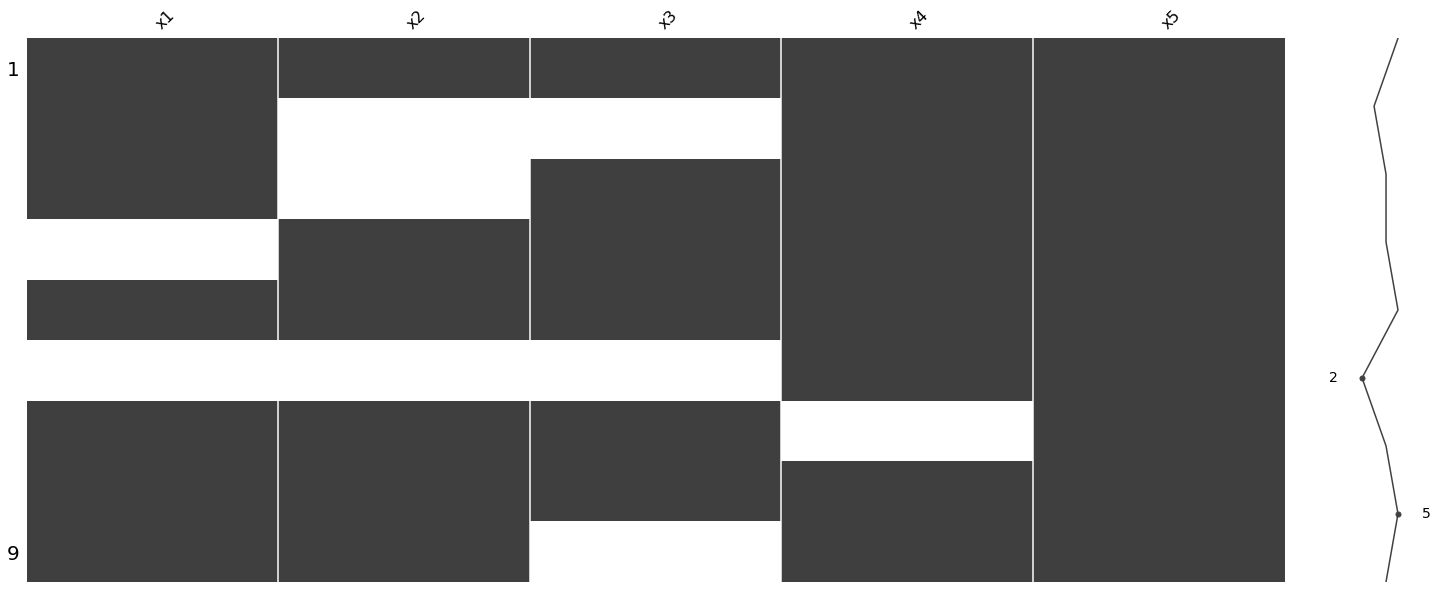

In [11]:
import matplotlib.pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show

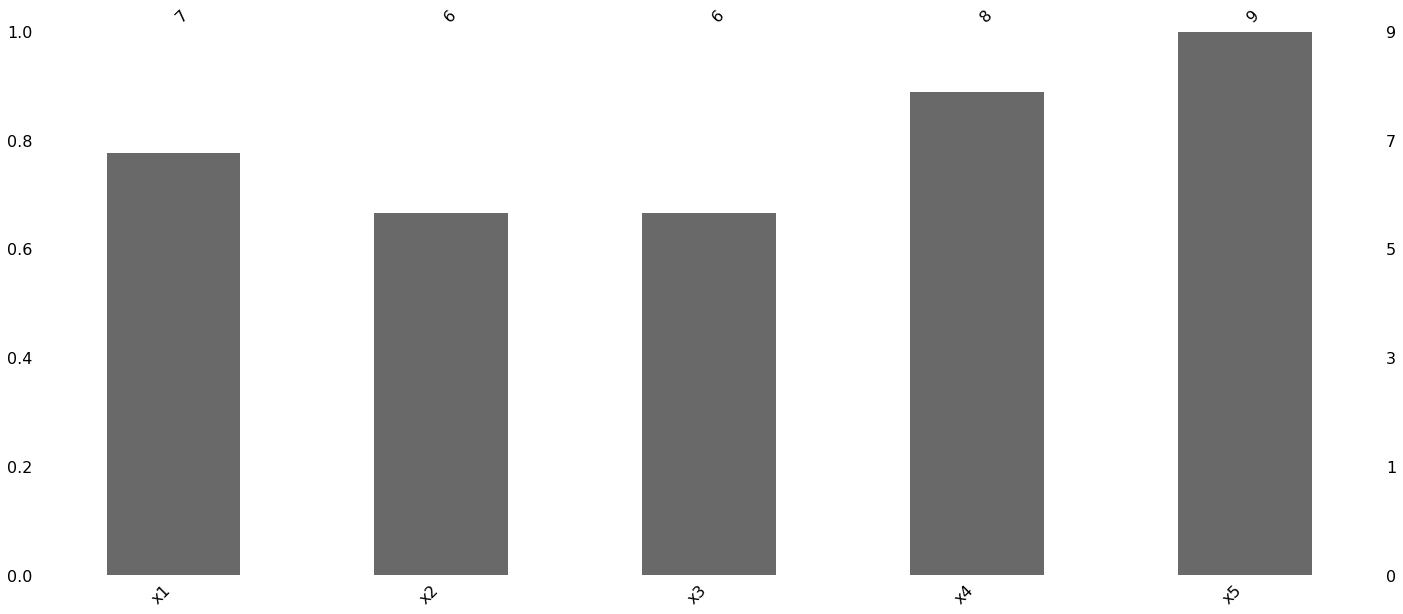

In [41]:
msno.bar(df)
plt.show()

In [45]:
titanic = pd.read_csv("./data/titanic_train.csv")
titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0


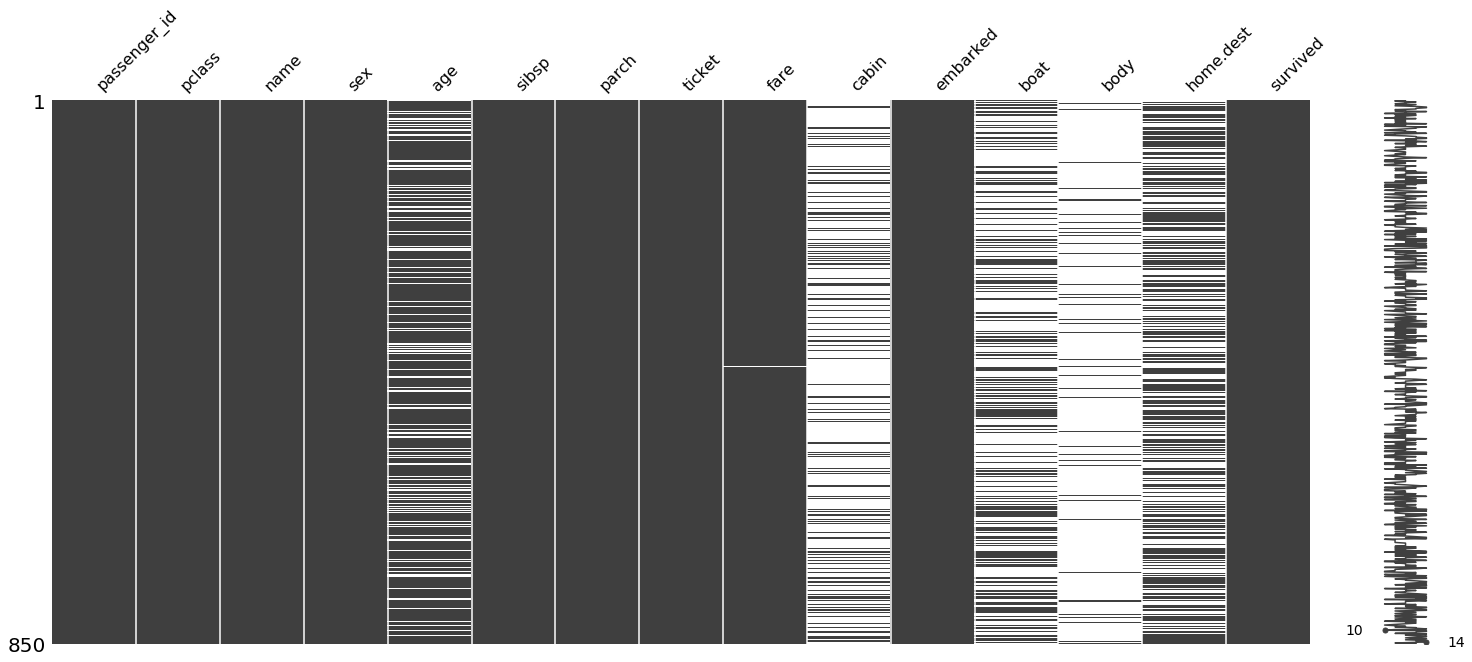

In [48]:
msno.matrix(titanic)
plt.show()

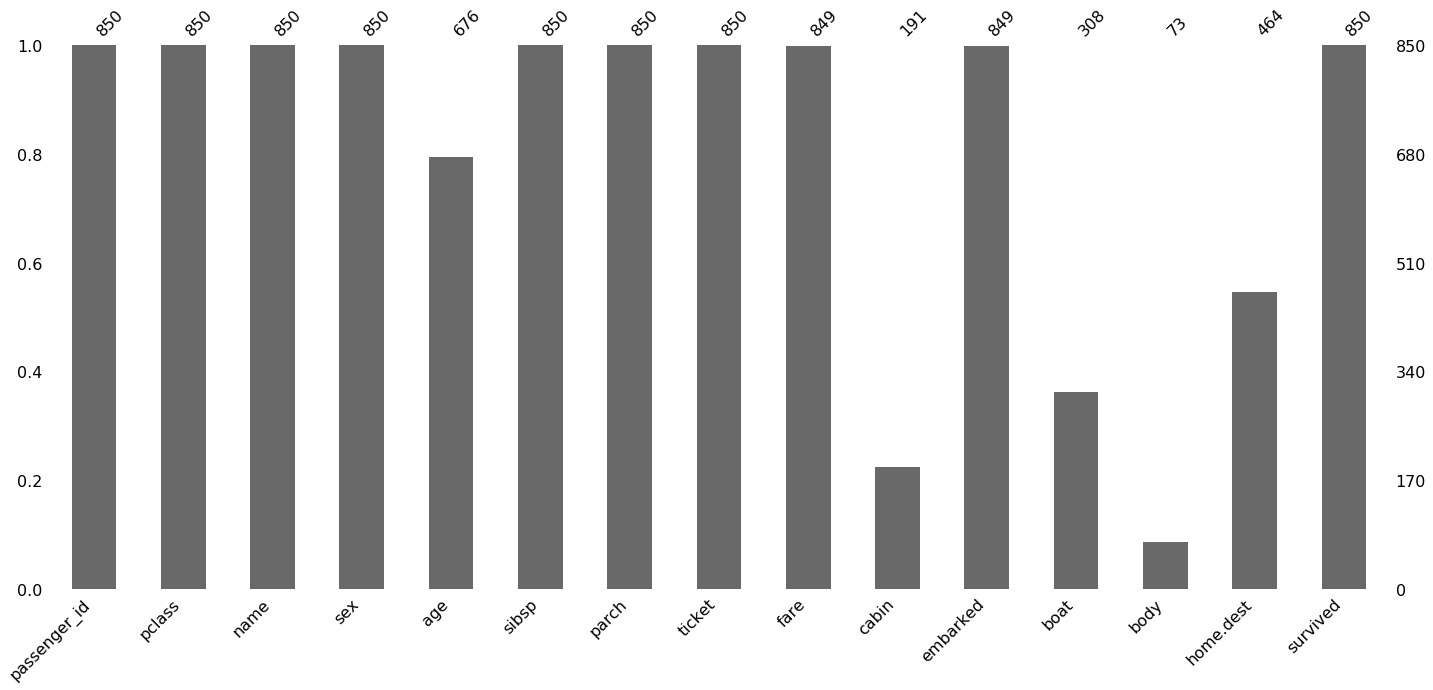

In [49]:
msno.bar(titanic)
plt.show()

### 결측데이터 처리방법
- 첫 번째 : 결측된 데이터가 많은 경우 데이터 전체 열 삭제(dropna)
- 두 번째 : 가짜 데이터로 채우는 방법(결측 데이터 대체 (imputation))
- 버리거나 or 채우거나

In [16]:
df.dropna()

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
4,5,0.5,5.0,2019-01-05,B
7,8,0.8,8.0,2019-01-08,B


In [17]:
df.dropna(axis=1)

,x5
0,A
1,B
2,C
3,A
4,B
5,C
6,A
7,B
8,C


In [18]:
# df가 7 이상인 것만 출력
df.dropna(thresh=7,axis=1)

,x1,x4,x5
0,1,2019-01-01,A
1,2,2019-01-02,B
2,3,2019-01-03,C
3,<NA>,2019-01-04,A
4,5,2019-01-05,B
5,<NA>,2019-01-06,C
6,7,NaT,A
7,8,2019-01-08,B
8,9,2019-01-09,C


In [19]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


* 데이터를 채우는 방법
    - sklearn의 SimpleImputer 클래스 사용 : mean, median, most_frequent 사용

In [30]:
df

,x1,x2,x3,x4,x5
0,1,0.1,1.0,2019-01-01,A
1,2,NaN,NaN,2019-01-02,B
2,3,NaN,3.0,2019-01-03,C
3,<NA>,0.4,4.0,2019-01-04,A
4,5,0.5,5.0,2019-01-05,B
5,<NA>,NaN,NaN,2019-01-06,C
6,7,0.7,7.0,NaT,A
7,8,0.8,8.0,2019-01-08,B
8,9,0.9,NaN,2019-01-09,C


In [34]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=6ff15fb759f51942dc1707084ac485bc2efc4e7ff4cbe52a0c8b3e046b3bbe58
  Stored in directory: c:\users\maerad7\appdata\local\pip\cache\wheels\23\9d\42\5ec745cbbb17517000a53cecc49d6a865450d1f5cb16dc8a9c
Successfully built sklearn


In [39]:
# 에러 해결할 것
from sklearn.impute import SimpleImputer
import numpy as np
imputer = SimpleImputer(strategy="mean")
imputer.fit(df)

In [25]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5'], dtype='object')

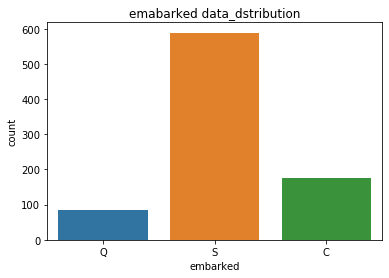

In [51]:
import seaborn as sns
sns.countplot(titanic.embarked)
plt.title("emabarked data_dstribution")
plt.show()

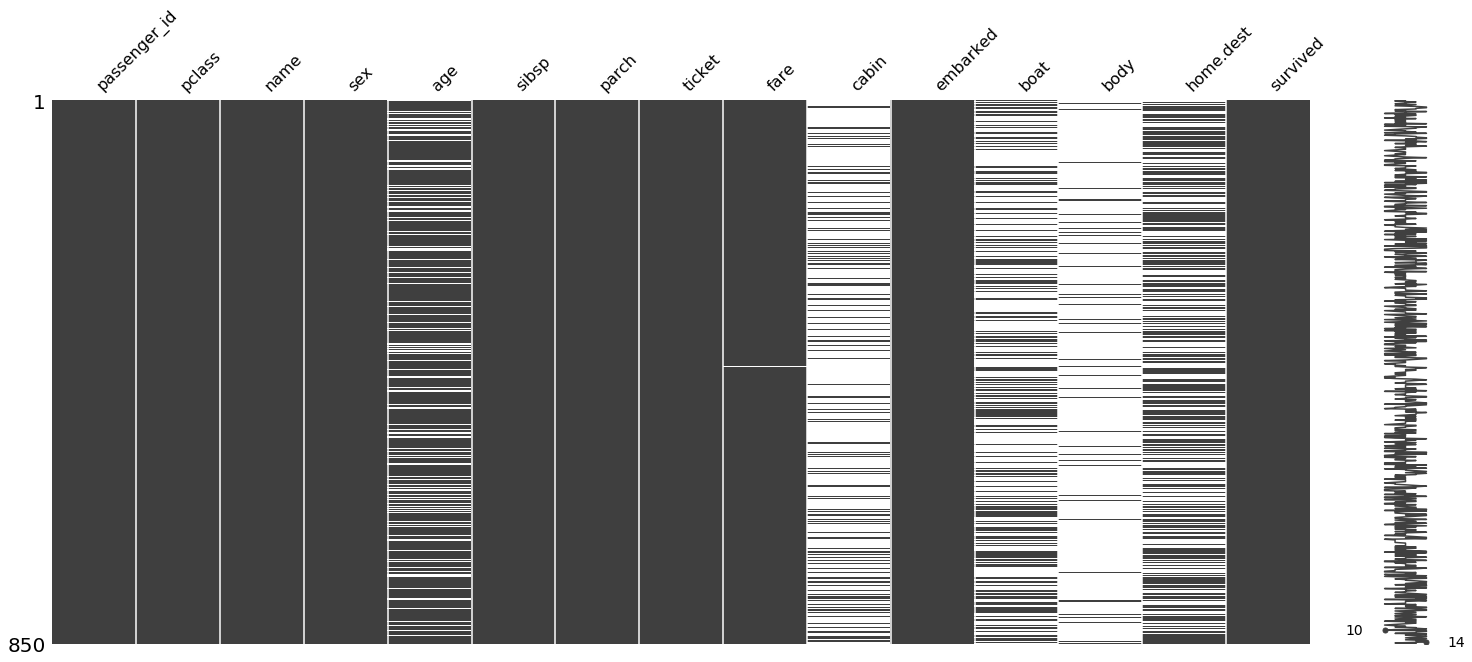

In [57]:
from sklearn.impute import SimpleImputer

imputer_embark = SimpleImputer(strategy="most_frequent")
titanic['embarked']= imputer_embark.fit_transform(titanic[["embarked"]])

msno.matrix(titanic)
plt.show()

In [60]:
titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,1216,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,699,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,1267,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,449,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,576,NaN,NaN,"Barre, Co Washington, VT",0


- 실수값에서는 most_frequent 쓰지 않기
- 평균값 , 중앙값 사용해야는데 분포가 대칭적이면 평균 값이나 중앙값 상관없는데 비대칭이 심하면 중앙값을 사용하는게 좋다.

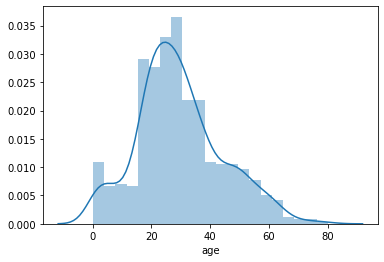

In [61]:
# 분포보기
# 비대칭으로 나오는 데이터들의 특징은 항상 양수인 데이터들.... -> 음수 값에 데이터가 없다. 중앙 값이 좋다.
sns.distplot(titanic.age.dropna())
plt.show()


In [62]:
imputer_age = SimpleImputer(strategy="median")

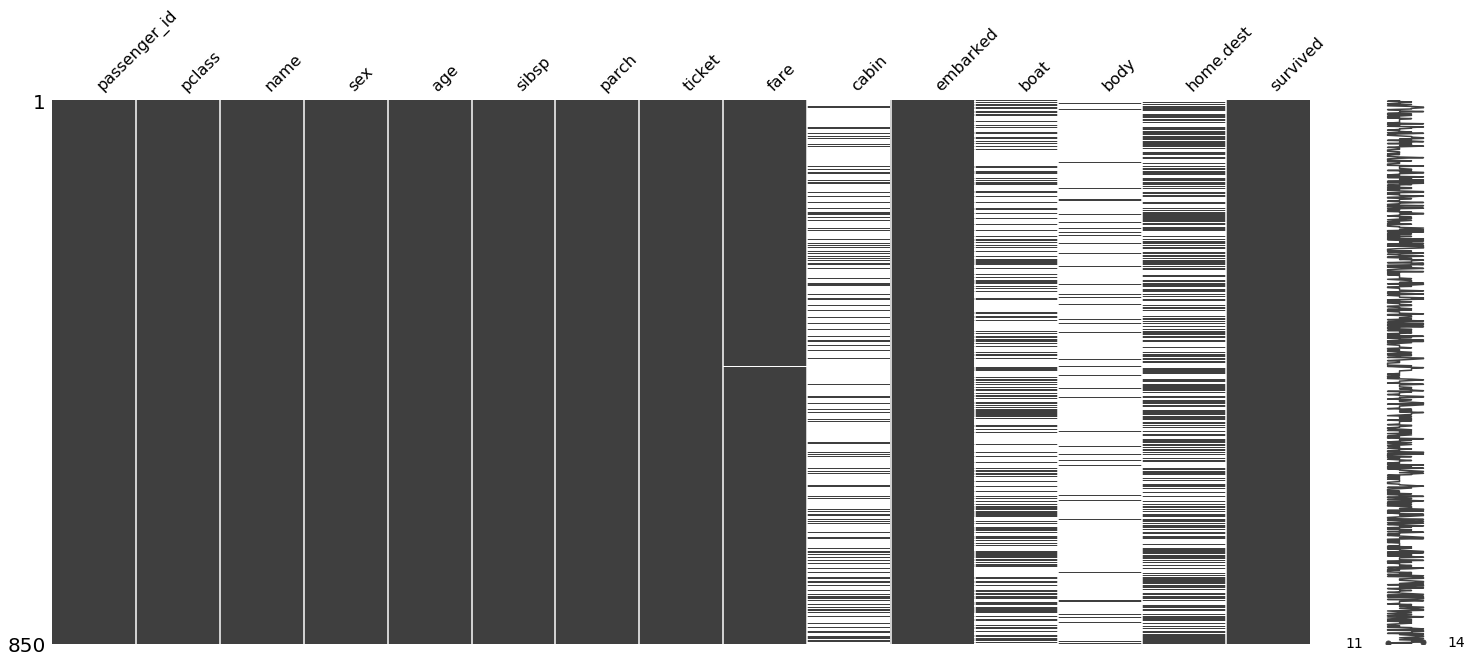

In [64]:
titanic['age']=imputer_age.fit_transform(titanic[['age']])

msno.matrix(titanic)
plt.show()

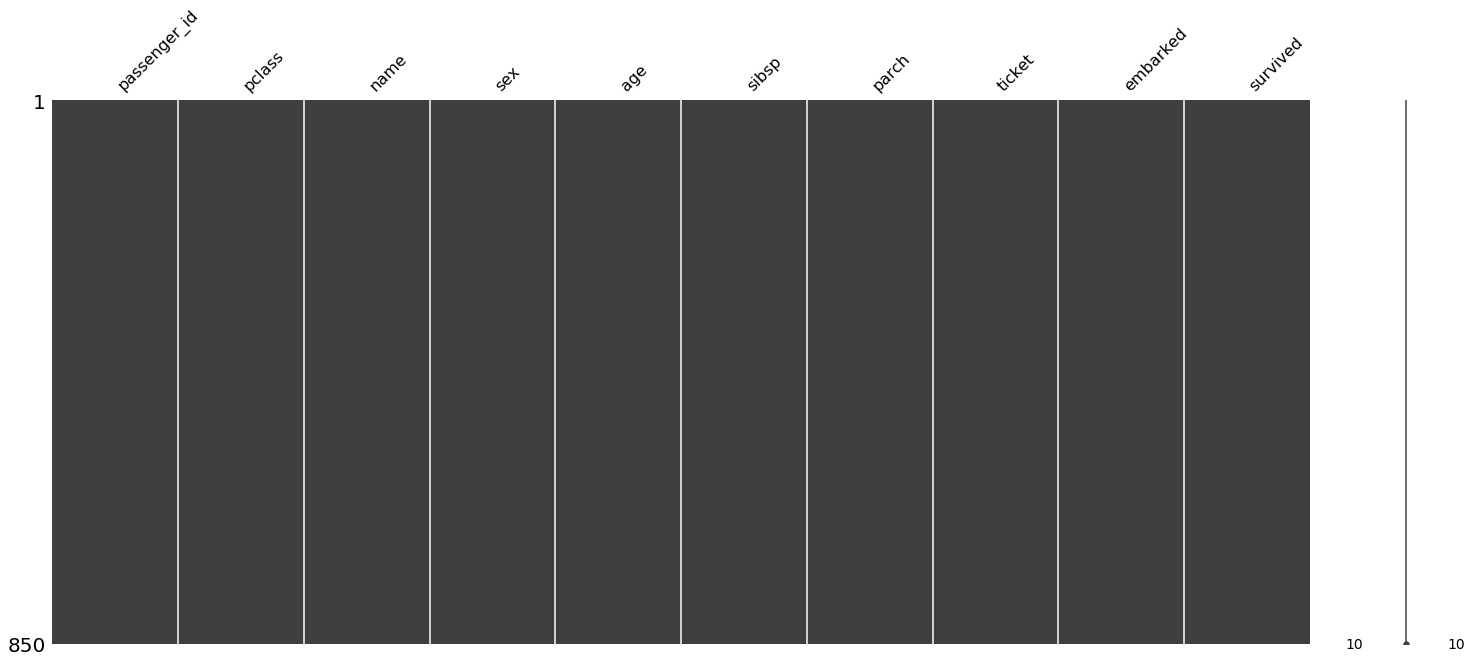

In [67]:
titanic = titanic.dropna(axis=1)
msno.matrix(titanic)

In [71]:
!pip install patsy

In [72]:
from patsy import demo_data

In [77]:
df = pd.DataFrame(demo_data('x1','x2','x3','x4','x5'))

In [78]:
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [80]:
from patsy import dmatrix
dmatrix("x1+0",data=df)

DesignMatrix with shape (5, 1)
       x1
  1.76405
  0.40016
  0.97874
  2.24089
  1.86756
  Terms:
    'x1' (column 0)

In [81]:
dmatrix("x1+x2+x3+0",data=df)

DesignMatrix with shape (5, 3)
       x1        x2       x3
  1.76405  -0.97728  0.14404
  0.40016   0.95009  1.45427
  0.97874  -0.15136  0.76104
  2.24089  -0.10322  0.12168
  1.86756   0.41060  0.44386
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x3' (column 2)

In [82]:
dmatrix("survived + pclass + age + 0",data=titanic)

DesignMatrix with shape (850, 3)
  survived  pclass  age
         1       3   28
         0       3   38
         0       3   30
         1       2   54
         0       2   40
         0       3   28
         0       3   19
         1       2   30
         1       3   22
         0       3   21
         0       1   27
         1       1   60
         1       1   56
         1       2   20
         0       3   16
         0       3   48
         0       2   40
         1       3   28
         1       1   22
         1       3   32
         1       3   27
         0       3   28
         1       2   24
         0       3   25
         1       3   18
         0       2   27
         0       3   35
         0       2   27
         0       3   28
         0       1   42
  [820 rows omitted]
  Terms:
    'survived' (column 0)
    'pclass' (column 1)
    'age' (column 2)
  (to view full data, use np.asarray(this_obj))

In [83]:
dmatrix("x1+ np.log(abs(x2))",df)

DesignMatrix with shape (5, 3)
  Intercept       x1  np.log(abs(x2))
          1  1.76405         -0.02298
          1  0.40016         -0.05120
          1  0.97874         -1.88811
          1  2.24089         -2.27090
          1  1.86756         -0.89014
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'np.log(abs(x2))' (column 2)

In [84]:
def ten_time(x):
    return 10 * x
dmatrix("x1+ten_time(x2)",df)

DesignMatrix with shape (5, 3)
  Intercept       x1  ten_time(x2)
          1  1.76405      -9.77278
          1  0.40016       9.50088
          1  0.97874      -1.51357
          1  2.24089      -1.03219
          1  1.86756       4.10599
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'ten_time(x2)' (column 2)

In [85]:
df

,x1,x2,x3,x4,x5
0,1.764052,-0.977278,0.144044,0.333674,-2.552990
1,0.400157,0.950088,1.454274,1.494079,0.653619
2,0.978738,-0.151357,0.761038,-0.205158,0.864436
3,2.240893,-0.103219,0.121675,0.313068,-0.742165
4,1.867558,0.410599,0.443863,-0.854096,2.269755


In [88]:
# 콜론기호를 곱하기 기호로 사용한다.
dmatrix("x1+x2+x1:x2+0",df)

DesignMatrix with shape (5, 3)
       x1        x2     x1:x2
  1.76405  -0.97728  -1.72397
  0.40016   0.95009   0.38018
  0.97874  -0.15136  -0.14814
  2.24089  -0.10322  -0.23130
  1.86756   0.41060   0.76682
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'x1:x2' (column 2)

- x1*x2 항은 상호작용 한다. 회귀분석에서 두개의 항이 동시에 들어가면 효과가 상호작용 한다.

In [90]:
# 컬럼추가
dmatrix("x1+x2+I(x1+x2)+0",df)

DesignMatrix with shape (5, 3)
       x1        x2  I(x1 + x2)
  1.76405  -0.97728     0.78677
  0.40016   0.95009     1.35025
  0.97874  -0.15136     0.82738
  2.24089  -0.10322     2.13767
  1.86756   0.41060     2.27816
  Terms:
    'x1' (column 0)
    'x2' (column 1)
    'I(x1 + x2)' (column 2)

### scaling

- center : 평균 0으로 스케일링
- standardize : 평균 0 표준편차를 1로
- scale : standraidize 와 같음
- 스케일링을 하면 계산에 사용됫던 값들이 desing_info 값에 저장된다

In [93]:
dm = dmatrix("center(x1) + 0",df)
dm

DesignMatrix with shape (5, 1)
  center(x1)
     0.31377
    -1.05012
    -0.47154
     0.79061
     0.41728
  Terms:
    'center(x1)' (column 0)

In [94]:
dm.design_info.factor_infos

{EvalFactor('center(x1)'): FactorInfo(factor=EvalFactor('center(x1)'),
            type='numerical',
            state=<factor state>,
            num_columns=1)}

- 스케일링 요소를 저장하는 이유 : 트레인 셋에서 저장된 스케틸링 요소를 테스트 데이터에서 사용해야 함

### sklearn preprocessing
1. train
2. fit
    - test 에서는 fit 하지말고 바로 transform으로 넘겨야된다. train 된 스케일 데이터로 하기 위해서
3. transform

In [108]:
X= np.arange(7).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.5],
       [-1. ],
       [-0.5],
       [ 0. ],
       [ 0.5],
       [ 1. ],
       [ 1.5]])

In [112]:
X2= np.vstack([X,[[1000]]])
X2

array([[   0],
       [   1],
       [   2],
       [   3],
       [   4],
       [   5],
       [   6],
       [1000]])

In [113]:
# outlier 존재해서 이상하게 나옴
scaler.fit_transform(X2)

array([[-0.38705669],
       [-0.38402392],
       [-0.38099115],
       [-0.37795839],
       [-0.37492562],
       [-0.37189286],
       [-0.36886009],
       [ 2.64570872]])

In [115]:
# RobustScaler 를 사용하면 아웃라이어가 섞여있어도 중앙 값으로 변환
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit_transform(X2)

array([[-1.00000000e+00],
       [-7.14285714e-01],
       [-4.28571429e-01],
       [-1.42857143e-01],
       [ 1.42857143e-01],
       [ 4.28571429e-01],
       [ 7.14285714e-01],
       [ 2.84714286e+02]])

In [116]:
# // PolynomialFeatures -> [1,x^2,x^3,....]
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  6., 36.]])

In [119]:
# FunctionTransformer -> [f1(x),f2(x),.......]
# 세타 -> sin세타, cos세타
X = 90*np.arange(9).reshape(-1,1)
X

array([[  0],
       [ 90],
       [180],
       [270],
       [360],
       [450],
       [540],
       [630],
       [720]])

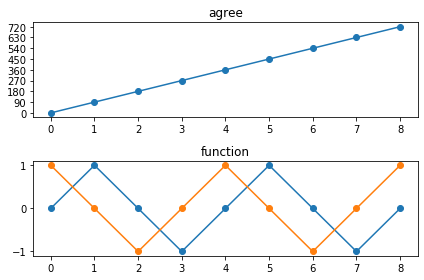

In [122]:
# 독립변수가 각도일때 유용하다. 각도는 sin세타와 cos세타로 구분해서 전처리한다.
from sklearn.preprocessing import FunctionTransformer

def dgree2sincos(X):
    x0 = np.sin(X*np.pi/180)
    x1 = np.cos(X*np.pi/180)
    x_new = np.hstack([x0,x1])
    return x_new

X2 = FunctionTransformer(dgree2sincos).fit_transform(X)
X2

plt.subplot(211)
plt.plot(X,marker='o')
plt.yticks(X.flatten())
plt.title("agree")

plt.subplot(212)
plt.plot(X2, marker="o")
plt.title("function")
plt.tight_layout()
plt.show()

## 범주형 데이터 처리
- 더미 변수화
- 카테고리 임베딩

### 1. 더미 변수화
- 이진지시자(Boolean indicator)
- 이진변수(binary variable)
- 지시변수(indicator variable)
- 설계변수(design variable)
- 처치(treatment)

In [125]:
df1 = pd.DataFrame(["male","female"],columns=['x'])
df1

,x
0,male
1,female


In [126]:
from patsy import dmatrix
dmatrix("x+0",df1)

DesignMatrix with shape (2, 2)
  x[female]  x[male]
          0        1
          1        0
  Terms:
    'x' (columns 0:2)

In [127]:
df2 = pd.DataFrame([1,2,3,4],columns=['x'])
df2

,x
0,1
1,2
2,3
3,4


In [129]:
dmatrix("C(x)+0",df2)

DesignMatrix with shape (4, 4)
  C(x)[1]  C(x)[2]  C(x)[3]  C(x)[4]
        1        0        0        0
        0        1        0        0
        0        0        1        0
        0        0        0        1
  Terms:
    'C(x)' (columns 0:4)

In [136]:
dm = dmatrix("C(x,levels=[2,1,3,4])+0",df2)
dm

DesignMatrix with shape (4, 4)
  Columns:
    ['C(x, levels=[2, 1, 3, 4])[2]',
     'C(x, levels=[2, 1, 3, 4])[1]',
     'C(x, levels=[2, 1, 3, 4])[3]',
     'C(x, levels=[2, 1, 3, 4])[4]']
  Terms:
    'C(x, levels=[2, 1, 3, 4])' (columns 0:4)
  (to view full data, use np.asarray(this_obj))

In [137]:
np.array(dm)

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### 2. 축소랭크 방식
- +0 있으면 풀랭크 방식
- reduced 랭크 방식 -> 기준 카테고리 값이 생긴다. 더미 변수가 의미하는 바는 기준 이었다가 기준이 아닌 것으로 변하면 어떤 결과가 변하는가? 라는 것이 된다.
- 기준값은 항상 1 이고 각 해당 되는 카테고리 값이 1이 된다.

In [139]:
# +0 생략하면 축소랭크 방식
dmatrix("x",df1)

DesignMatrix with shape (2, 2)
  Intercept  x[T.male]
          1          1
          1          0
  Terms:
    'Intercept' (column 0)
    'x' (column 1)

In [140]:
dmatrix("C(x, Treatment('male'))",df1)

DesignMatrix with shape (2, 2)
  Intercept  C(x, Treatment('male'))[T.female]
          1                                  0
          1                                  1
  Terms:
    'Intercept' (column 0)
    "C(x, Treatment('male'))" (column 1)

### 3. 두 개의 범주형 변수가 있는 경우
- 통합 축소형 방식
- 상호작용 방식

#### 통합축소형방식

In [141]:
df3 = pd.DataFrame([['A','B'],['B','X'],['A','Y'],['B','Y']])

In [142]:
df3

,0,1
0,A,B
1,B,X
2,A,Y
3,B,Y


#### 상호작용 방식
- AX,BX,AY,BY

### 3. 카테고리 임베딩
- 범주값의 특성을 나타내는 연속 값 혹은 연속 값 벡터를 사용하는 방법이다.
- ex) 운동 선수의 이름의 범주값 대신에 운동선수의 나이 연봉 신체 능력치를 사용함 